## Import modules

In [2]:
# Dataframes
import pandas as pd
import geopandas as gpd

#Graphs

#Surfaces

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns



## What we'll talk about today

Jupyter lab

- combination of markdown and executable code cells
- state preserving (makes iteration easy)

reading 'any' format into a few common datastructures - these are what we interact with during analyses.

- vector

- raster

- graph

## (Geo-)Dataframes

(geographic) tables / vector

objectives:

- import datasets
- understand structure (head, tail, shape, vector types (point, linestring, polygon, multilinestring/polygons, dtypes, crs (projection, reprojecting), data exploration (describe/min/max), plotting (color by column), filtering, new columns)
- query/index e.g. row selection
- merge/join. From pandas to geopandas. Work with dataframe, add geodataframe/ create geodataframe with sensor information

tasks for students:

- import new dataset
- create new column, based on existing columns
- find max/min of a certain variable, maybe within a geographic area (admin area)? 
- simple plot with custom cmap?
- filter dataframe

Source: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-500-meter-bij-500-meter-met-statistieken

Starting with gadm

In [18]:
admin = gpd.read_file('data/raw_data/gadm41_NLD_2.json')

In [19]:
admin.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,AaenHunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((6.56990 52.94650, 6.58990 52.9..."
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((6.64080 53.02570, 6.63920 53.0..."
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((6.74570 52.87920, 6.73630 52.9..."
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((6.87160 52.65300, 6.86450 52.6..."
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,DeWolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((6.27320 52.66810, 6.27640 52.6..."


In [20]:
admin.tail()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
350,NLD.14.89_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoetermeer,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZR,"MULTIPOLYGON (((4.42360 52.05130, 4.41620 52.0..."
351,NLD.14.90_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoeterwoude,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZD,"MULTIPOLYGON (((4.55210 52.13850, 4.54780 52.1..."
352,NLD.14.104_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zuidplas,NA,NA,Gemeente,Municipality,NA,NA,"MULTIPOLYGON (((4.56690 52.05880, 4.60930 52.0..."
353,NLD.14.91_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zwijndrecht,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZW,"MULTIPOLYGON (((4.55540 51.83070, 4.56250 51.8..."
354,NLD.14.1_1,NLD,Netherlands,NLD.14_1,ZuidHollandseMeren,NA,ZuidHollandseMeren,NA,NA,Gemeente,Waterbody,NA,NA,"MULTIPOLYGON (((4.15760 51.68240, 4.16620 51.6..."


In [22]:
admin.shape

(355, 14)

In [21]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
admin = admin.to_crs(28992)

<AxesSubplot:>

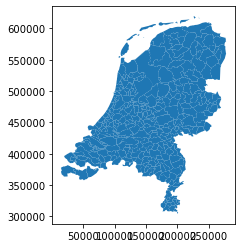

In [26]:
admin.plot()

In [27]:
admin["centroid"] = admin.geometry.centroid

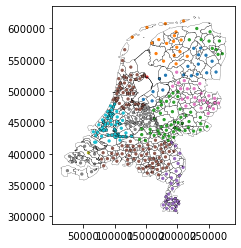

In [32]:
# Plot centroids
ax = admin.set_geometry("centroid").plot('NAME_1', markersize=5)
# Plot polygons without color filling
admin.plot(
    'NAME_1',ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
);

## Tasks:

- filter gadm dataset (Zuid-holland)
- import cbs dataset
- check crs
- 
- 

In [5]:
cbs = gpd.read_file('data/raw_data/cbs_vk500_2022_v1.gpkg')

In [6]:
cbs = gpd.read_file('data/raw_data/2023-cbs_vk500_2022_v1.zip')

In [7]:
cbs.head()

,crs28992res500m,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,...,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
0,E2260N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((226000.000 619000.000, 226000...."
1,E2265N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((226500.000 619500.000, 227000...."
2,E2270N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((227000.000 619500.000, 227500...."
3,E2275N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((227500.000 619500.000, 228000...."
4,E2280N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((228000.000 619500.000, 228500...."


In [8]:
cbs.tail()

,crs28992res500m,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,...,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
151103,E1995N3070,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((199500.000 307500.000, 200000...."
151104,E1905N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((190500.000 307000.000, 191000...."
151105,E1910N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((191000.000 307000.000, 191500...."
151106,E1920N3065,15,5,5,-99997,-99997,-99997,5,-99997,90,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,3,5,"MULTIPOLYGON (((192000.000 307000.000, 192500...."
151107,E1925N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,5,5,"MULTIPOLYGON (((192500.000 307000.000, 193000...."


In [9]:
cbs.shape

(151108, 39)

<AxesSubplot:>

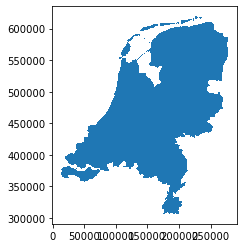

In [10]:
cbs.plot()

In [14]:
cbs["centroid"] = cbs.geometry.centroid

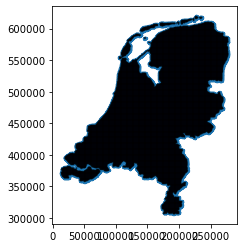

In [15]:
# Plot centroids
ax = cbs.set_geometry("centroid").plot(markersize=5)
# Plot polygons without color filling
cbs.plot(
    ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
);

## Surfaces (raster)

objectives:

- difference between vector/ raster
- load raster
- understand structure (shape, bands, crs)
